<a href="https://colab.research.google.com/github/Jayasurya227/Data-Storytelling-Analysing-Survival-on-the-Titanic/blob/main/Data_Storytelling_Analysing_Survival_on_the_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1)Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Set plot  style for better aesthetics
sns.set(style='whitegrid')


**2)Load the Data Set**

In [ ]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset/blob/main/Datasets/Titanic-Dataset.csv'

Cloning into 'Titanic-Dataset.csv'...
fatal: repository 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset/blob/main/Datasets/Titanic-Dataset.csv/' not found


In [ ]:
#Load the Data Set
titanic_df=pd.read_csv("/content/Titanic-Dataset.csv")
#Display the first 5 rows
print("First 5 rows of the dataset")
titanic_df.head(5)

First 5 rows of the dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Print last 5 rows of the Data Set
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
#Display Summery of the Data Set
print("Summery of the Data Set")
titanic_df.info()

Summery of the Data Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Get the Descriptive statistics for Numericul Columns
print("Descriptive Statistics for Numeric Columns")
titanic_df.describe()

Descriptive Statistics for Numeric Columns


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**3)Data Cleaning**

In [ ]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print("Missing Values Before Cleaning:")
titanic_df.isnull().sum()

Missing Values Before Cleaning:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
median=titanic_df['Age'].median()
print(median)

28.0


In [ ]:
#1.Handle Missing "Age" Values
#We use the median to fill missing ages Becuse the agae distribution can be skewed
median_age=titanic_df['Age'].median()
titanic_df['Age']=titanic_df['Age'].fillna(median_age)

#Verify that there are no more missing values in the columns we handled so far
print("Missing Values After Cleaning:")
print(titanic_df[['Age','Embarked','Cabin']].isnull().sum())

Missing Values After Cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


In [ ]:
mode=titanic_df['Embarked'].mode()[0]
print(mode)

S


In [ ]:
#2.Hnadle missing "Embarked" values
#Since there are only two values we will fill them the most commom porrt of embarked (the mode)
mode_embarked=titanic_df['Embarked'].mode()[0]
titanic_df['Embarked']=titanic_df['Embarked'].fillna(mode_embarked)

#Verify that there are no more missing values in the columns we handled so far
print("Missing Values After Cleaning:")
print(titanic_df[['Age','Embarked','Cabin']].isnull().sum())


Missing Values After Cleaning:
Age           0
Embarked      0
Cabin       687
dtype: int64


In [ ]:
#Handle the cabin column
#with over 77% missing data,input is not a good idea,instead ,we; will create a new feature 'Has-Cabin'
titanic_df['Has_Cabin']=titanic_df['Cabin'].notna().astype('int')
titanic_df.drop('Cabin',axis=1,inplace=True)


In [ ]:
titanic_df['Has_Cabin'].value_counts()

,count
Has_Cabin,
0,687
1,204


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


**4)Univariate Analysis**

Analyzing categorical features:


Text(0.5, 1.0, 'Embarked Distribution')

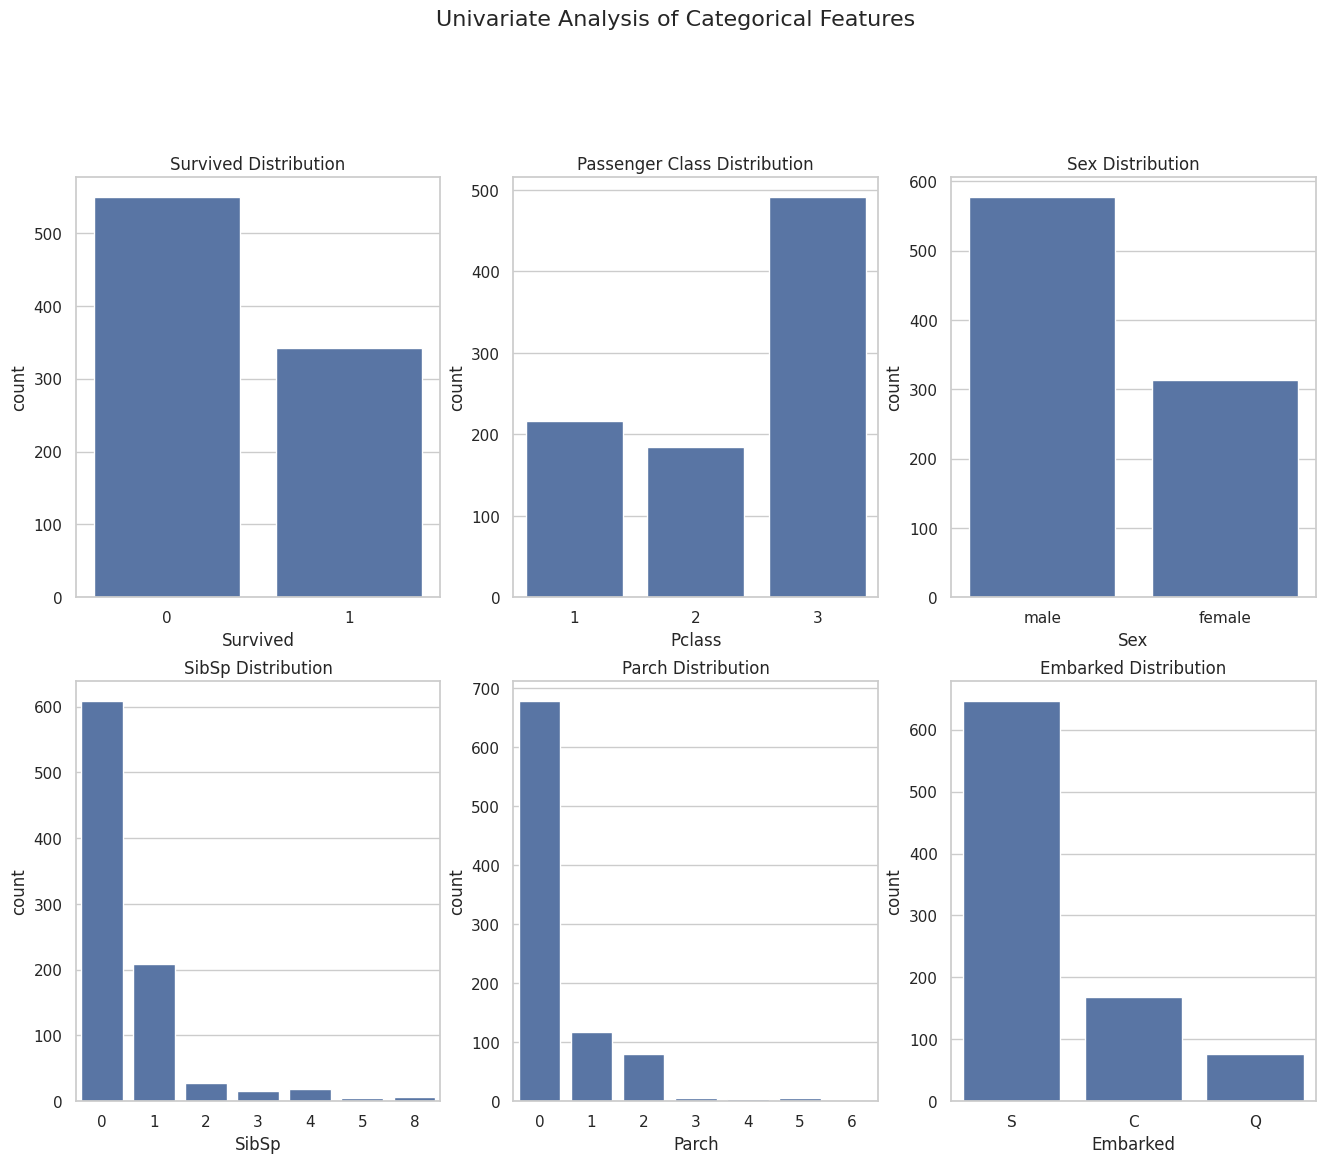

In [ ]:
print("Analyzing categorical features:")
#set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(16,12))
fig.suptitle("Univariate Analysis of Categorical Features", y=1.02, fontsize=16)  # Adjusted suptitle position

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plotting each categorical feature
sns.countplot(ax=axes[0], x='Survived', data=titanic_df).set_title('Survived Distribution')
sns.countplot(ax=axes[1], x='Pclass', data=titanic_df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[2], x='Sex', data=titanic_df).set_title('Sex Distribution')
sns.countplot(ax=axes[3], x='SibSp', data=titanic_df).set_title('SibSp Distribution')
sns.countplot(ax=axes[4], x='Parch', data=titanic_df).set_title('Parch Distribution')
sns.countplot(ax=axes[5], x='Embarked', data=titanic_df).set_title('Embarked Distribution')



Analyzing numerical fratures:


Text(0.5, 1.0, 'Fare Distribution')

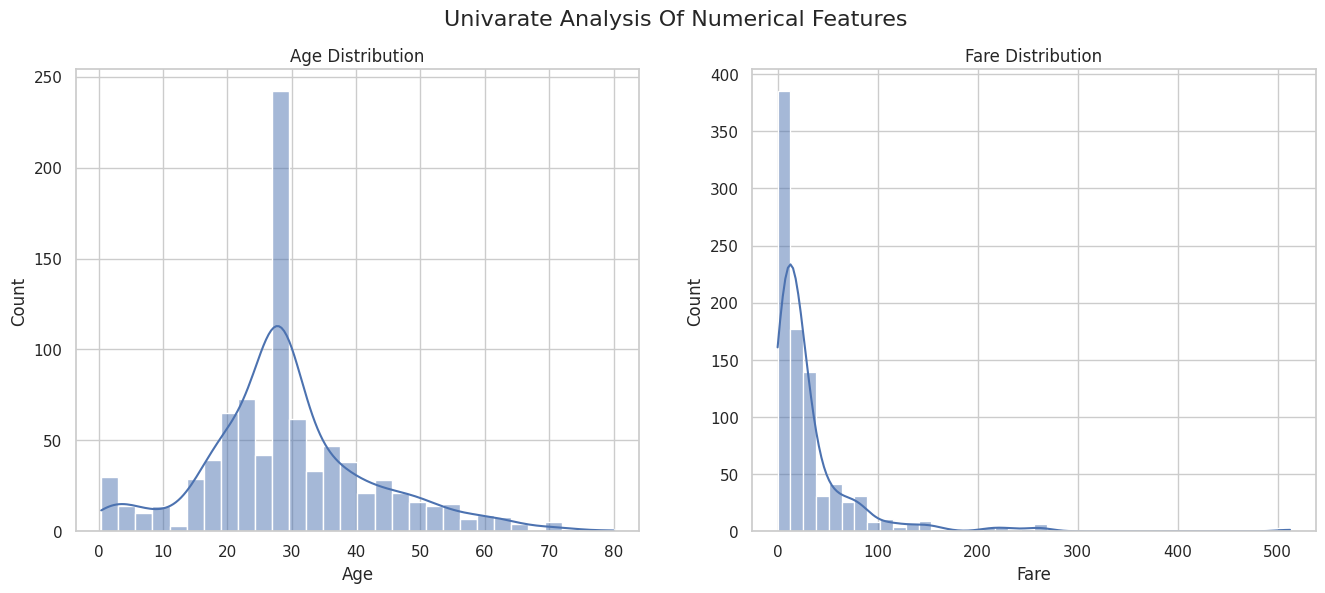

In [ ]:
print("\nAnalyzing numerical fratures:")

fig,axes=plt.subplots(1,2,figsize=(16,6))
fig.suptitle("Univarate Analysis Of Numerical Features",fontsize=16)

#Plotting Age distribution
sns.histplot(ax=axes[0],data=titanic_df,x='Age',kde=True,bins=30).set_title('Age Distribution')

#Plotting Fare distribution
sns.histplot(ax=axes[1],data=titanic_df,x='Fare',kde=True,bins=40).set_title('Fare Distribution')
#

5)**Bivariate Analysis**

Bivariate Analysis:Features vs.Survival


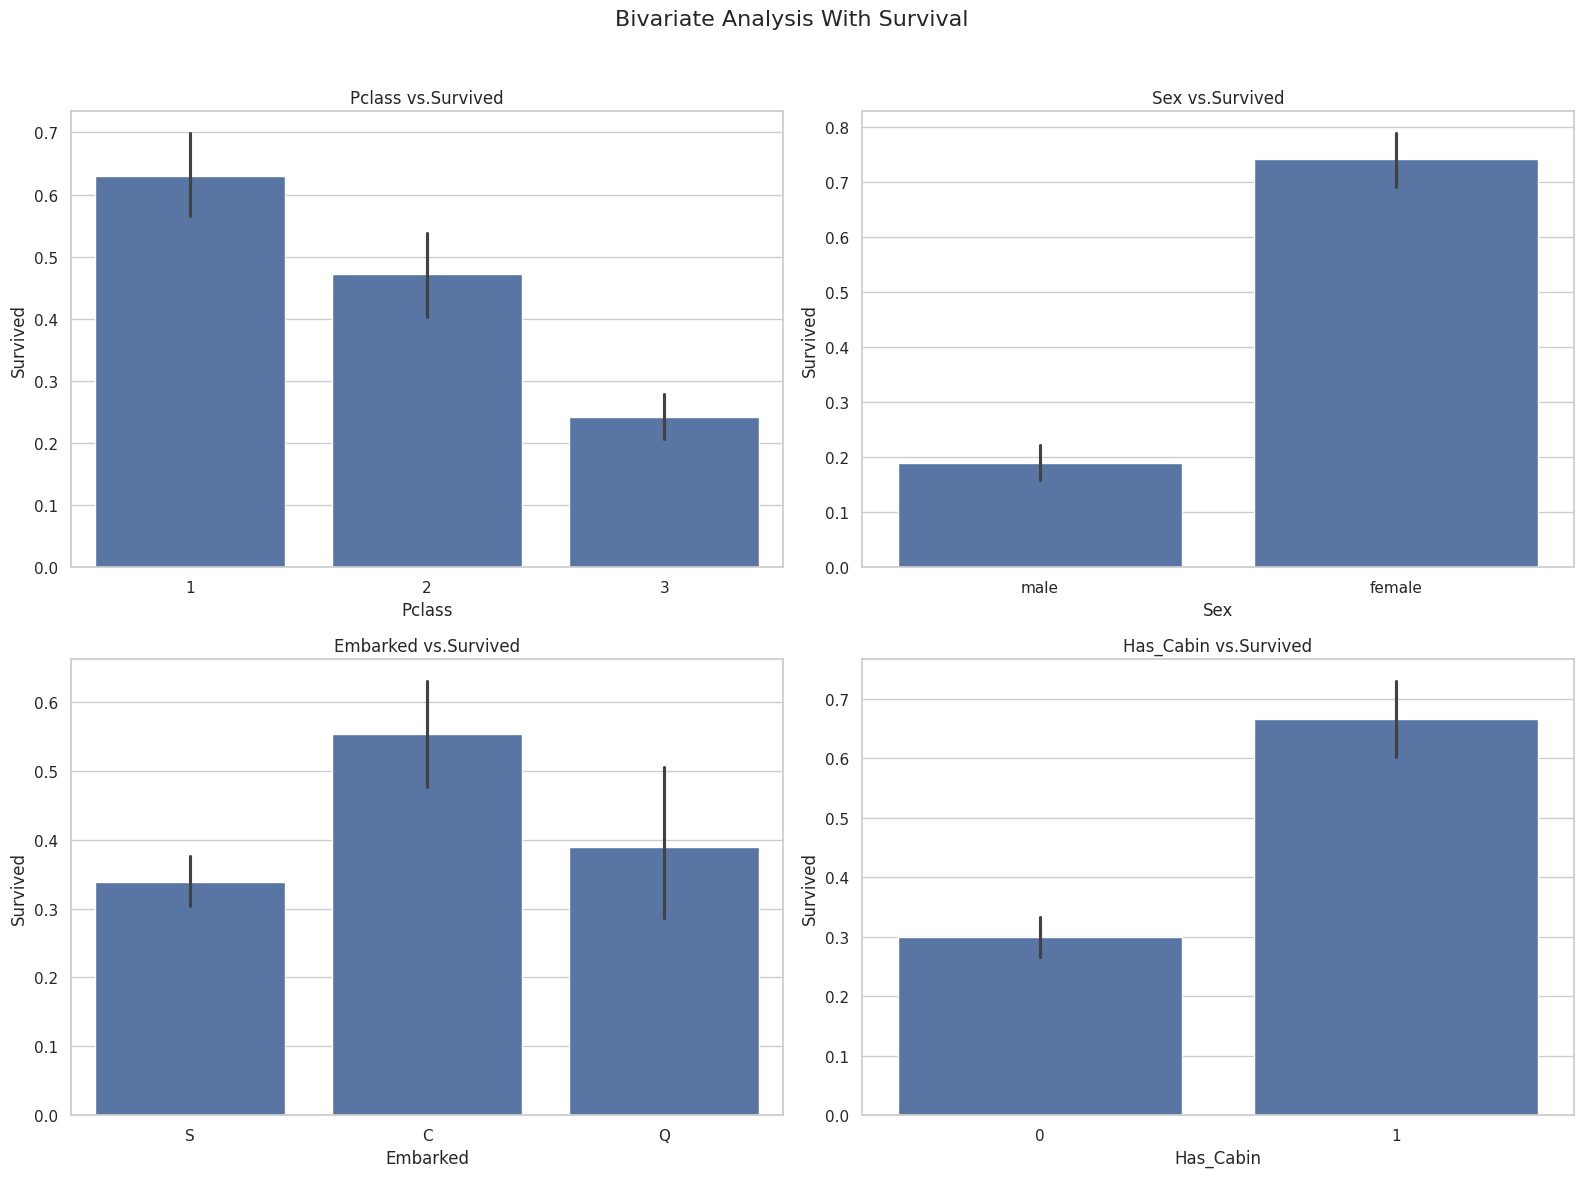

In [ ]:
print("Bivariate Analysis:Features vs.Survival")

fig,axes=plt.subplots(2,2,figsize=(16,12))
fig.suptitle("Bivariate Analysis With Survival",fontsize=16)

#Pclass vs .Survived
sns.barplot(ax=axes[0,0],x='Pclass',y='Survived',data=titanic_df).set_title('Pclass vs.Survived')
#Sex vs.Survived
sns.barplot(ax=axes[0,1],x='Sex',y='Survived',data=titanic_df).set_title('Sex vs.Survived')
#Embarked vs.Survived
sns.barplot(ax=axes[1,0],x='Embarked',y='Survived',data=titanic_df).set_title('Embarked vs.Survived')
#Has_Cabin vs .Survived
sns.barplot(ax=axes[1,1],x='Has_Cabin',y='Survived',data=titanic_df).set_title('Has_Cabin vs.Survived')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

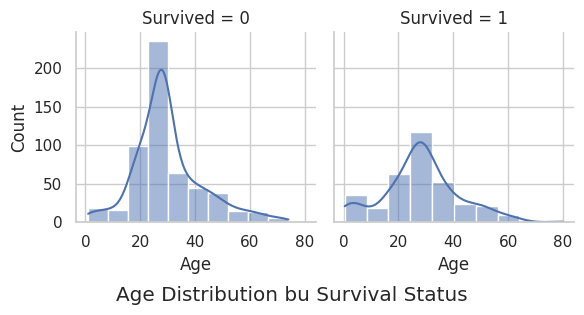

In [ ]:
#Age vs Survival
g=sns.FacetGrid(titanic_df,col='Survived')
g.map(sns.histplot,'Age',bins=10,kde=True)
plt.suptitle('Age Distribution bu Survival Status',y=.02)
plt.show()

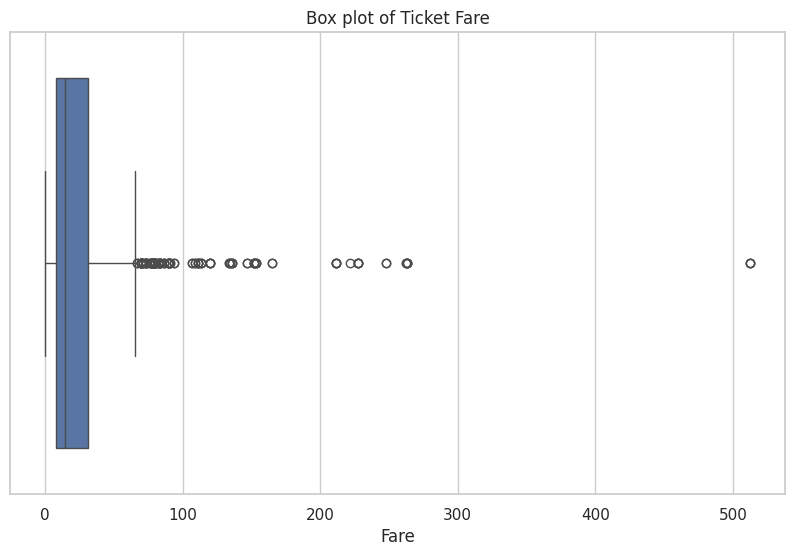

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fare',data=titanic_df)
plt.title("Box plot of Ticket Fare")
plt.xlabel('Fare')
plt.show()

**6)Feature Engineering**

In [ ]:
#1.Create a Familysize Feature
titanic_df['FamilySize']=titanic_df['SibSp']+titanic_df['Parch']+1
#2.Createan IsAlone Feature
titanic_df['IsAlone']=0
titanic_df.loc[titanic_df['FamilySize']==1,'IsAlone']=1

print("Created 'FamiliSize" and 'IsAlone:')
titanic_df[['FamilySize','IsAlone']].head()


IsAlone:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


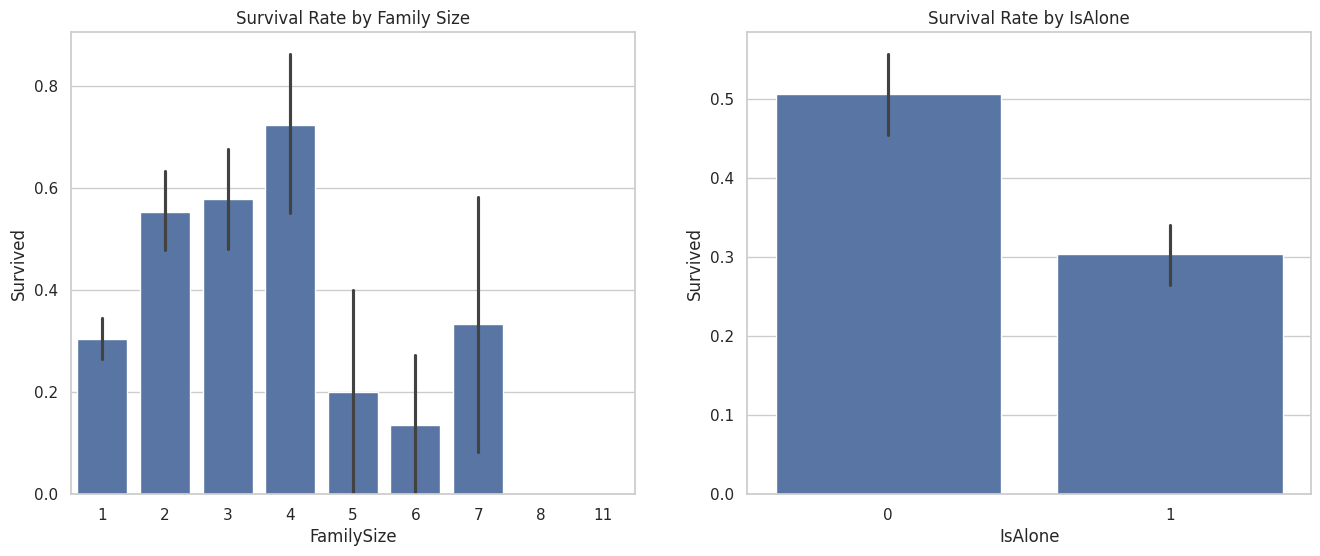

In [ ]:
2.#Analyze the new family-related features againest Survival
fig,axes=plt.subplots(1,2,figsize=(16,6))

#survival Rate by familySize
sns.barplot(ax=axes[0],x='FamilySize',y='Survived',data=titanic_df).set_title("Survival Rate by Family Size")
#Survival Rate by IsAlone
sns.barplot(ax=axes[1],x='IsAlone',y='Survived',data=titanic_df).set_title("Survival Rate by IsAlone")

plt.show()

In [ ]:
#3.Extract 'Title'  from the Name column
titanic_df['Title']=titanic_df['Name'].str.extract(r'([A-Za-z]+)\.',expand=False)

#Let see the diffrebt titles
print("Extract Titles:")
titanic_df['Title'].value_counts()

Extract Titles:


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


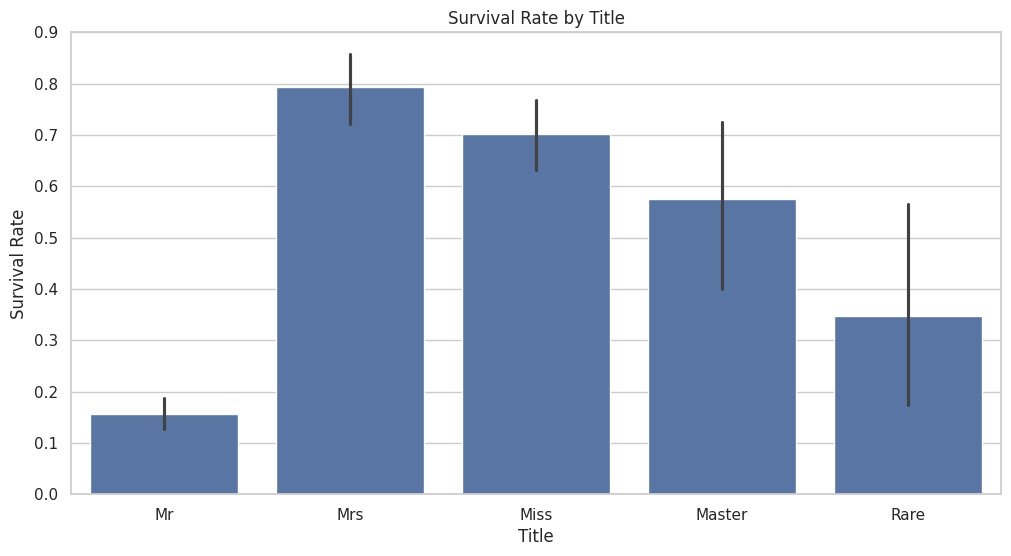

In [ ]:
#simplyfy the titles by grouping rare ones into a Race category
titanic_df['Title']=titanic_df['Title'].replace(['Dr','Rev','Col','Major','Countess','Sir','Jonkheer','Lady','Capt','Don','Dona'],'Rare')

titanic_df['Title']=titanic_df['Title'].replace('Mile','Miss')
titanic_df['Title']=titanic_df['Title'].replace('Mlle','Miss')
titanic_df['Title']=titanic_df['Title'].replace('Ms','Miss')
titanic_df['Title']=titanic_df['Title'].replace('Mme','Mrs')

#Lets see the survival rate by the new,cleaned titles
plt.figure(figsize=(12,6))
sns.barplot(x='Title',y='Survived',data=titanic_df)
plt.title("Survival Rate by Title")
plt.ylabel("Survival Rate")
plt.show()

**Multivarriate Analysis**

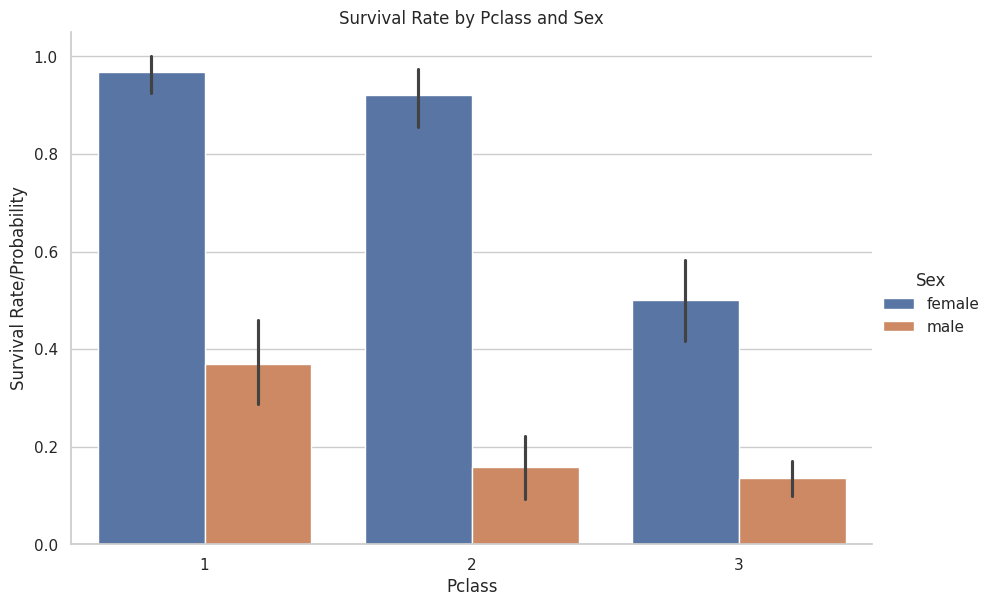

In [ ]:
#Survival rate by Pclass and Sex
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df,kind='bar',height=6,aspect=1.5)
plt.title("Survival Rate by Pclass and Sex")
plt.ylabel("Survival Rate/Probability")
plt.show()

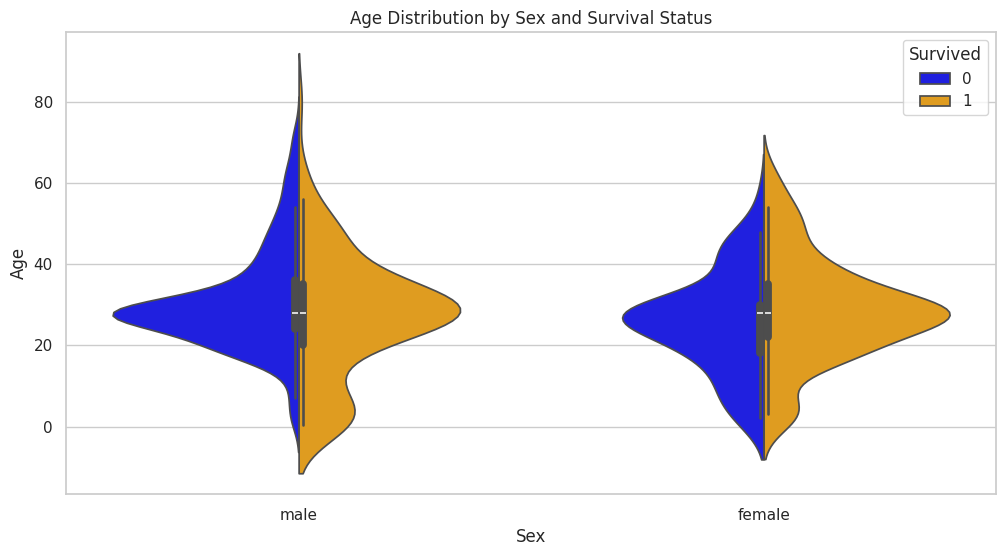

In [ ]:
#Violine plot to see age distribution by sex and Survival statues
plt.figure(figsize=(12,6))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=titanic_df,split=True,palette={0:'blue',1:'orange'})
plt.title("Age Distribution by Sex and Survival Status")
plt.show()

**8)Correlation Analysis**

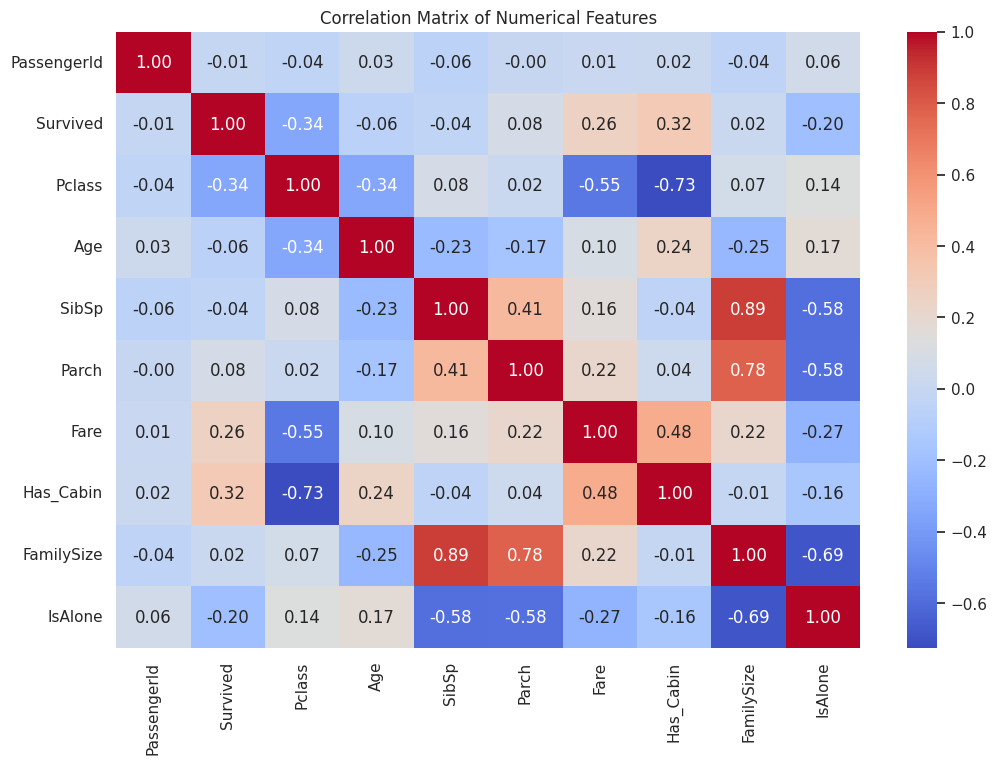

In [ ]:
#correlation HeatMap for numerical Features
plt.figure(figsize=(12, 8))
numeric_cols = titanic_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()